# Word Frequency, Word Dispersion, and Collocation Analysis
by Priyana Patel and Vicki Truong

### Preprocessing 

In [1]:
#Set random seed for reproduction of code. 
import numpy as np
np.random.seed(42)

#Change working directory to where corpus is located. 
import os
os.chdir("/Users/vickijtruong/Documents/DH199/S20/WEEK2/delaware")
all_files = os.listdir("/Users/vickijtruong/Documents/DH199/S20/WEEK2/delaware")
#print(all_files)
len(all_files)

80

In [2]:
import nltk
from nltk.corpus import stopwords 
#Import stop words. 
stop_words = stopwords.words('english')

#If you would like to add or remove stopwords, uncomment the code: 
more_stop = ['null', 'pp', 'https', 'collections', 'vol']
stop_words = stop_words + more_stop

#not_stopwords = [''] 
#stop_words = set([word for word in stop_words if word not in not_stopwords])
#print(stop_words)

In [3]:
from nltk.tokenize import word_tokenize 
import string

#Read each file into the working directory. Remove stop words, non-alphabetical terms, and punctuation. Append each processed file into the docs list. 
docs = []

for file in all_files:
    with open(file,'r') as f:
        text = f.read()        
        tokenized = word_tokenize(text)
        tokens_lower = [w.lower() for w in tokenized]
        filtered = [w for w in tokens_lower if not w in stop_words and w.isalpha()] 
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in filtered]
        stripped = list(filter(None, stripped))
        docs.append(stripped)
        
#print(docs)
print(len(docs))

#flatten the nested list since docs is a list of lists
flattened_docs = [y for x in docs for y in x]

80


### Word Frequency 

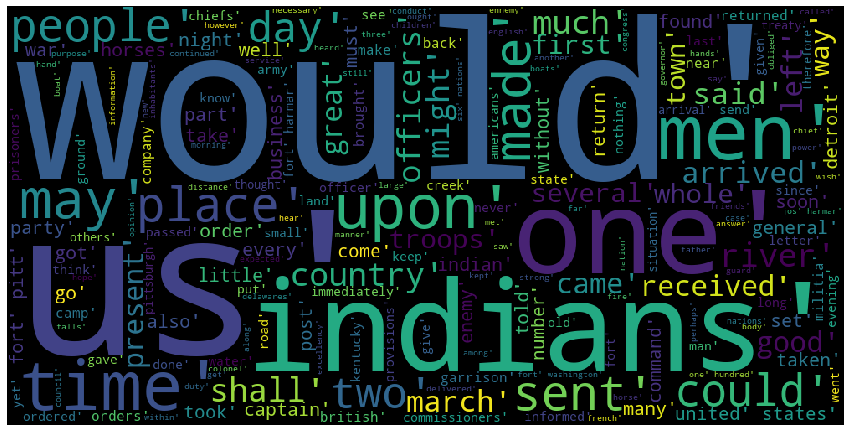

In [19]:
strdocs = str(docs)
tokens = word_tokenize(strdocs)
text = nltk.Text(tokens)

#word cloud 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

wordcloud = WordCloud(width = 1000, height = 500).generate(strdocs)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

In [5]:
from nltk import FreqDist

#frequency distribution
fdist1 = FreqDist(flattened_docs)
print(fdist1)

<FreqDist with 10312 samples and 154531 outcomes>


In [6]:
#display the top 50 most frequent terms 
fdist1.most_common(50)

[('would', 1213),
 ('us', 1161),
 ('men', 1040),
 ('one', 1005),
 ('fort', 987),
 ('indians', 939),
 ('two', 709),
 ('upon', 675),
 ('captain', 660),
 ('time', 660),
 ('miles', 637),
 ('day', 627),
 ('great', 597),
 ('general', 589),
 ('could', 521),
 ('river', 517),
 ('may', 507),
 ('made', 505),
 ('every', 504),
 ('place', 494),
 ('harmar', 469),
 ('much', 465),
 ('sent', 462),
 ('country', 455),
 ('people', 452),
 ('shall', 411),
 ('arrived', 402),
 ('left', 394),
 ('good', 384),
 ('march', 379),
 ('officers', 378),
 ('major', 375),
 ('several', 367),
 ('letter', 359),
 ('three', 359),
 ('night', 355),
 ('nations', 353),
 ('indian', 346),
 ('town', 343),
 ('war', 341),
 ('might', 337),
 ('troops', 335),
 ('lieutenant', 332),
 ('present', 329),
 ('take', 327),
 ('first', 317),
 ('received', 309),
 ('said', 307),
 ('came', 307),
 ('party', 304)]

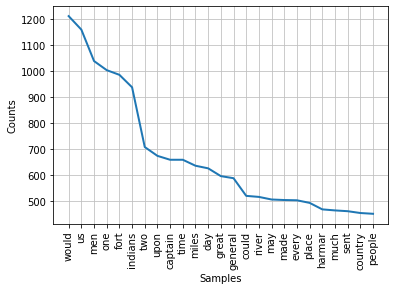

In [7]:
fdist1.plot(25)

### Word Dispersion
Note: The documents were not in chronological order, so the results are relative to how the documents were originally filed. 

import numpy as np
import matplotlib as plt
import pandas as pd
from nltk.draw.dispersion import dispersion_plot

top15 = fdist1.most_common(15)
topwords = [char for (char, count) in top15]
plt.figure.Figure(figsize=(20, 6))
dispersion_plot(flattened_docs, topwords)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


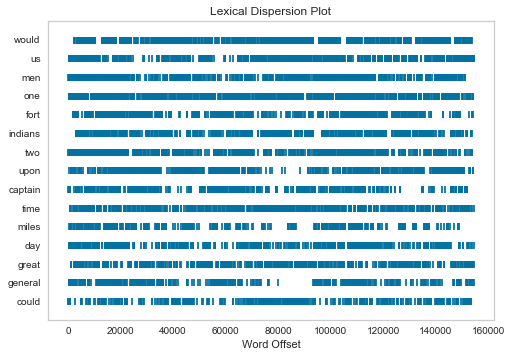

DispersionPlot(annotate_docs=False,
               ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a22858f90>,
               colormap=None, colors=None, ignore_case=False, labels=None,
               target_words=['would', 'us', 'men', 'one', 'fort', 'indians',
                             'two', 'upon', 'captain', 'time', 'miles', 'day',
                             'great', 'general', 'could'])

In [8]:
from yellowbrick.text import DispersionPlot, dispersion
#dispersion plot automatically outputs words in reverse order of the top words list
top15 = fdist1.most_common(15)
topwords = [char for (char, count) in top15]

dispersion(topwords, docs)

### Bigrams and Trigrams

In [9]:
from nltk.collocations import BigramCollocationFinder 
from nltk.metrics import BigramAssocMeasures 

In [10]:
biagram_collocation = BigramCollocationFinder.from_words(flattened_docs) 
biagram_collocation.nbest(BigramAssocMeasures.likelihood_ratio, 15)

[('united', 'states'),
 ('fort', 'pitt'),
 ('jos', 'harmar'),
 ('presqu', 'isle'),
 ('fort', 'washington'),
 ('new', 'york'),
 ('de', 'peyster'),
 ('six', 'nations'),
 ('commanding', 'officer'),
 ('one', 'hundred'),
 ('dear', 'sir'),
 ('humble', 'servant'),
 ('fort', 'harmar'),
 ('women', 'children'),
 ('c', 'jos')]

In [11]:
from nltk.corpus import stopwords 
  
stopset = set(stopwords.words('english')) 
#Filter out stopwords and tokens less than 3 characters long
filter_stops = lambda w: len(w) < 3 or w in stopset 
  
biagram_collocation.apply_word_filter(filter_stops) 
biagram_collocation.nbest(BigramAssocMeasures.likelihood_ratio, 15) 

[('united', 'states'),
 ('fort', 'pitt'),
 ('jos', 'harmar'),
 ('presqu', 'isle'),
 ('fort', 'washington'),
 ('new', 'york'),
 ('six', 'nations'),
 ('commanding', 'officer'),
 ('one', 'hundred'),
 ('dear', 'sir'),
 ('humble', 'servant'),
 ('fort', 'harmar'),
 ('women', 'children'),
 ('major', 'wyllys'),
 ('next', 'day')]

In [12]:
from nltk.collocations import TrigramCollocationFinder 
from nltk.metrics import TrigramAssocMeasures 

stopset = set(stopwords.words('english')) 
filter_stops = lambda w: len(w) < 3 or w in stopset

trigram_collocation = TrigramCollocationFinder.from_words(flattened_docs) 
trigram_collocation.apply_word_filter(filter_stops) 
trigram_collocation.apply_freq_filter(3) 
trigram_collocation.nbest(TrigramAssocMeasures.likelihood_ratio, 15) 

[('united', 'states', 'america'),
 ('president', 'united', 'states'),
 ('prejudice', 'united', 'states'),
 ('protection', 'united', 'states'),
 ('peace', 'united', 'states'),
 ('subjects', 'united', 'states'),
 ('hatchet', 'united', 'states'),
 ('thirteen', 'united', 'states'),
 ('agent', 'united', 'states'),
 ('united', 'states', 'forts'),
 ('people', 'united', 'states'),
 ('ceded', 'united', 'states'),
 ('united', 'states', 'fixed'),
 ('friendship', 'united', 'states'),
 ('disposition', 'united', 'states')]

### Ngrams with "harmar" as a Member

In [13]:
import nltk
from nltk.collocations import *

finder = BigramCollocationFinder.from_words(flattened_docs)
bigram_measures = nltk.collocations.BigramAssocMeasures() 

# only bigrams that appear 3+ times
#finder.apply_freq_filter(3)
pronoun_filter = lambda *w: 'harmar' not in w
# only bigrams that contain 'harmar'
finder.apply_ngram_filter(pronoun_filter)
# return the 15 n-grams with the highest likelihood ratio
finder.nbest(bigram_measures.likelihood_ratio,15)

[('jos', 'harmar'),
 ('fort', 'harmar'),
 ('general', 'harmar'),
 ('colonel', 'harmar'),
 ('harmar', 'joins'),
 ('harmar', 'honorable'),
 ('harmar', 'december'),
 ('harmar', 'lieutenant'),
 ('josiah', 'harmar'),
 ('harmar', 'september'),
 ('harmar', 'mouth'),
 ('harmar', 'desires'),
 ('harmar', 'doctor'),
 ('harmar', 'april'),
 ('harmar', 'june')]

In [14]:
finder = TrigramCollocationFinder.from_words(flattened_docs)
trigram_measures = nltk.collocations.TrigramAssocMeasures() 

# only trigrams that appear 3+ times
finder.apply_freq_filter(3)
pronoun_filter = lambda *w: 'harmar' not in (w)
# only trigrams that contain 'harmar'
finder.apply_ngram_filter(pronoun_filter)
# return the 15 n-grams with the highest likelihood ratio
finder.nbest(trigram_measures.likelihood_ratio,15)

[('c', 'jos', 'harmar'),
 ('servant', 'jos', 'harmar'),
 ('jos', 'harmar', 'honorable'),
 ('jos', 'harmar', 'lieutenant'),
 ('jos', 'harmar', 'captain'),
 ('jos', 'harmar', 'excellency'),
 ('jos', 'harmar', 'doctor'),
 ('honor', 'jos', 'harmar'),
 ('jos', 'harmar', 'joseph'),
 ('jos', 'harmar', 'major'),
 ('sincerely', 'jos', 'harmar'),
 ('jos', 'harmar', 'ebenezer'),
 ('jos', 'harmar', 'colonel'),
 ('jos', 'harmar', 'general'),
 ('friend', 'jos', 'harmar')]

In [15]:
finder = BigramCollocationFinder.from_words(flattened_docs)
bigram_measures = nltk.collocations.BigramAssocMeasures() 

# only bigrams that appear 3+ times
finder.apply_freq_filter(3)
pronoun_filter = lambda *w: 'peyster' not in w
# only bigrams that contain 'peyster'
finder.apply_ngram_filter(pronoun_filter)
# return the 15 n-grams with the highest likelihood ratio
finder.nbest(bigram_measures.likelihood_ratio,15)

[('de', 'peyster'),
 ('peyster', 'frederick'),
 ('peyster', 'commandant'),
 ('peyster', 'arent'),
 ('peyster', 'watson'),
 ('peyster', 'alexander'),
 ('peyster', 'said')]

In [16]:
finder = TrigramCollocationFinder.from_words(flattened_docs)
trigram_measures = nltk.collocations.TrigramAssocMeasures() 

# only trigrams that appear 3+ times
finder.apply_freq_filter(3)
pronoun_filter = lambda *w: 'peyster' not in (w)
# only trigrams that contain 'peyster'
finder.apply_ngram_filter(pronoun_filter)
# return the 15 n-grams with the highest likelihood ratio
finder.nbest(trigram_measures.likelihood_ratio,15)

[('arent', 'de', 'peyster'),
 ('major', 'de', 'peyster'),
 ('servant', 'de', 'peyster'),
 ('de', 'peyster', 'frederick'),
 ('de', 'peyster', 'commandant'),
 ('de', 'peyster', 'arent'),
 ('de', 'peyster', 'watson'),
 ('de', 'peyster', 'alexander'),
 ('de', 'peyster', 'said'),
 ('signed', 'de', 'peyster'),
 ('colonel', 'de', 'peyster'),
 ('peyster', 'arent', 'de'),
 ('peyster', 'frederick', 'haldimand'),
 ('peyster', 'said', 'children')]

### Bigram Collocate Cloud 

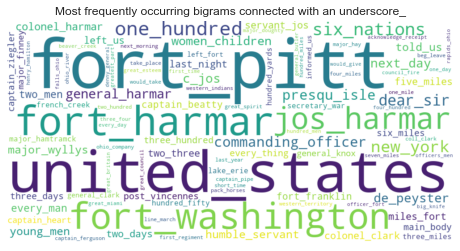

In [17]:
import matplotlib.pyplot as plt
from operator import itemgetter

# setup and score the bigrams using the raw frequency
finder = BigramCollocationFinder.from_words(flattened_docs)
bigram_measures = BigramAssocMeasures()
scored = finder.score_ngrams(bigram_measures.raw_freq)

# sort highest to lowest based on the score
scoredList = sorted(scored, key=itemgetter(1), reverse=True)
 
# load dictionary
word_dict = {}
 
listLen = len(scoredList)

# set the dictionary key to the scored value
for i in range(listLen):
    word_dict['_'.join(scoredList[i][0])] = scoredList[i][1]

# set word cloud parameters and plot the word cloud
WC_height = 500
WC_width = 1000
WC_max_words = 100
 
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width, background_color="white")
 
wordCloud.generate_from_frequencies(word_dict)
 
plt.title('Most frequently occurring bigrams connected with an underscore_')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
#wordCloud.to_file("Bigram_Cloud_New.png")
plt.show()

### Trigram Collocate Cloud 

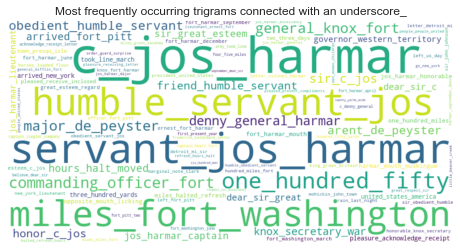

In [18]:
# setup and score the trigrams using the raw frequency
finder = TrigramCollocationFinder.from_words(flattened_docs)
trigram_measures = TrigramAssocMeasures()
scored = finder.score_ngrams(trigram_measures.raw_freq)

# sort highest to lowest based on the score
scoredList = sorted(scored, key=itemgetter(1), reverse=True)

# load dictionary 
word_dict = {}

listLen = len(scoredList)

# set the dictionary key to the scored value
for i in range(listLen):
    word_dict['_'.join(scoredList[i][0])] = scoredList[i][1]

# set word cloud parameters and plot the word cloud 
WC_height = 500
WC_width = 1000
WC_max_words = 100
 
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width, background_color="white")
 
wordCloud.generate_from_frequencies(word_dict)
 
plt.title('Most frequently occurring trigrams connected with an underscore_')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
#wordCloud.to_file("Trigram_Cloud_New")
plt.show()

## Analysis

For this analysis, I was primarily interested in why some terms appeared more frequently than others, so collocation analysis helped with this. The bigrams and trigrams and their collocate clouds were more informative to the specifics of the Delaware corpus than the frequency distribution. At first glance, I was able to remove some stop words that were not in the top 25/50 occurring words list, but they showed up in the collocate clouds. The collocate clouds are based on raw frequency, and I was intrigued that they yielded different results from the bigrams and trigrams, which had been based on likelihood ratio (though PMI is another way to measure collocations). From the bigram and trigram collocate clouds, a bigram that stood out is "jos harmar" and there are several trigrams around it. At first, I thought jos was a stopword with little lexical meaning. However, when I looked up "jos harmar", I discovered that it probably refers to Josiah Harmar. Josiah Harmar was a general for the United States Army who lead Harmar's campaign to defeat Native American groups such as the Delaware and Miami, but did not succeed in doing so. Another phrase that stands out is "de peyster", which refers to Arent DePeyster, a British military officer who led British and Native American forces during the American Revolution. I find it interesting that there is a lot of war-related terms and people considering the Delaware were considered "women" so others would fight for them. Many of the bigrams and trigrams that were ranked by likelihood ratio revolve around "united states" and locations of forts. This gives us a bit more geographical context given the time period and the historical events of the time. I find these actors to be of potential interest. I would like to understand the context of the corpus better to know which parties were speaking. "delaware" is not mentioned as much as the term "indians" is used. Thus, wonder if the Delaware were the ones writing the text or people like Harmar and DePeyster were. In either case, I wonder about the sentiments of these texts and if they vary by speaker. 

References:
1. https://avidml.wordpress.com/2017/08/03/word-cloud-with-frequently-occurring-bigrams-and-salient-bigrams/
2. https://www.pythonprogramming.in/how-to-create-a-word-cloud-from-a-corpus.html
3. https://medium.com/@nicharuch/collocations-identifying-phrases-that-act-like-individual-words-in-nlp-f58a93a2f84a